### Image compression

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def compress(minNumSV=2,maxNumSV=15):
    myl = []
    for line in open('digit.txt').readlines():
        newRow = []
        for i in range(32):
            newRow.append(int(line[i]))
        myl.append(newRow)
    myMat = np.mat(myl)
    
    nb_axes=10*(maxNumSV-minNumSV+2)
    fig, axes = plt.subplots(maxNumSV-minNumSV+2, 1, figsize=(nb_axes, nb_axes/3))
    axes[0].imshow(myMat.A)
    axes[0].set_title('original image')
    axes[0].xaxis.set_visible(False)
    axes[0].yaxis.set_visible(False)
    
    for numSV in range(minNumSV, maxNumSV+1):
        
        U,Sigma,VT = np.linalg.svd(myMat)
        SigRecon = np.mat(np.zeros((numSV, numSV)))
        for k in range(numSV):
            SigRecon[k,k] = Sigma[k]
        reconMat = U[:,:numSV]*SigRecon*VT[:numSV,:]
        idx = numSV-minNumSV+1
        axes[idx].imshow(reconMat)
        axes[idx].set_title( str(numSV) + ' singular values')
        axes[idx].xaxis.set_visible(False)
        axes[idx].yaxis.set_visible(False)

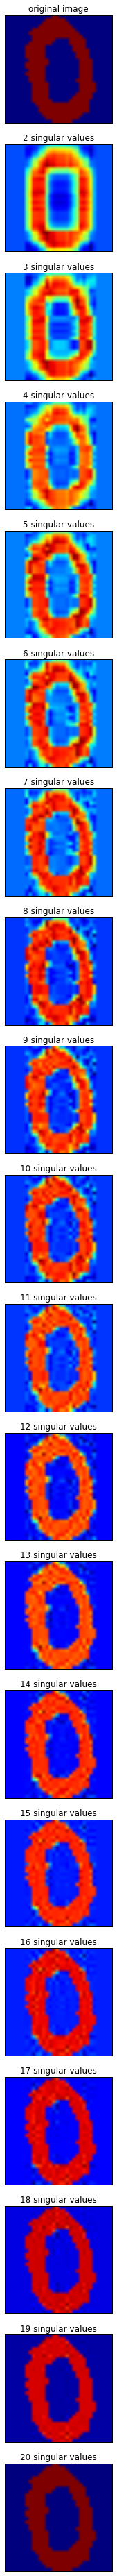

In [7]:
compress(2,20)